# **22AIE301 - Probablistic Reasoning**<br>
**Title - Air Quality Forecast Using Bayesian Ridged Model**<br>
**Bayesian Ridge Model - Proposed**

**Team Member 1 - Shashidhar.R - CH.EN.U4AIE22058**<br>
**Team Member 2 - Sri Bhuvana Sankar.T - CH.EN.U4AIE22053**<br>
**Team 13**

# **Importing the Necessary Library** 

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import networkx as nx
from tabulate import tabulate

# **Preprocessing the Data**

**Load and Prepare the Dataset**

In [2]:
df = pd.read_csv('Dataset\\2015_Air_quality_in_northern_Taiwan.csv', low_memory=False)
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df = df.drop(columns=['station', 'time'])
df = df.apply(pd.to_numeric, errors='coerce')
df.ffill(inplace=True)
df.dropna(inplace=True)

**Standardize the Dataset**

In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

**Split Data into Train and Test Sets**

In [4]:
# Split data into train and test sets (80% training)
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

**Function to create LSTM data**

In [5]:
# Function to create LSTM data
def create_lstm_data(data, look_back=5):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), :])
        Y.append(data[i + look_back, 0])  # Predicting PM2.5
    return np.array(X), np.array(Y)

look_back = 5
X_train, y_train = create_lstm_data(train, look_back)
X_test, y_test = create_lstm_data(test, look_back)

# **Dataset Information**

**No of Rows in the Dataset**

In [6]:
num_rows = df.shape[0]  
print(f"Number of rows: {num_rows}")

Number of rows: 218356


**No of columns in the Dataset**

In [7]:
num_columns = df.shape[1] 
print(f"Number of columns: {num_columns}")

Number of columns: 21


**Columns in the Dataset**

In [8]:
print(df.columns)

Index(['AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PH_RAIN',
       'PM10', 'PM2.5', 'RAINFALL', 'RAIN_COND', 'RH', 'SO2', 'THC', 'UVB',
       'WD_HR', 'WIND_DIREC', 'WIND_SPEED', 'WS_HR'],
      dtype='object')


**Sample information from the dataset**

In [9]:
print(tabulate(df.head(), headers='keys', tablefmt='psql'))

+-----+------------+-------+------+--------+------+-------+-------+------+-----------+--------+---------+------------+-------------+------+-------+-------+-------+---------+--------------+--------------+---------+
|     |   AMB_TEMP |   CH4 |   CO |   NMHC |   NO |   NO2 |   NOx |   O3 |   PH_RAIN |   PM10 |   PM2.5 |   RAINFALL |   RAIN_COND |   RH |   SO2 |   THC |   UVB |   WD_HR |   WIND_DIREC |   WIND_SPEED |   WS_HR |
|-----+------------+-------+------+--------+------+-------+-------+------+-----------+--------+---------+------------+-------------+------+-------+-------+-------+---------+--------------+--------------+---------|
| 284 |         16 |     2 | 0.59 |   0.19 |  4.1 |  25   |    29 |   22 |       4.9 |     37 |      19 |        0.4 |          64 |   86 |   2   |   2.2 |     0 |      75 |           81 |          3   |     2.7 |
| 285 |         16 |     2 | 0.49 |   0.15 |  2.8 |  21   |    24 |   24 |       4.7 |     32 |      15 |        1   |          59 |   86 |   2 

**Overall Information of the Dataset**

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 218356 entries, 284 to 218639
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   AMB_TEMP    218356 non-null  float64
 1   CH4         218356 non-null  float64
 2   CO          218356 non-null  float64
 3   NMHC        218356 non-null  float64
 4   NO          218356 non-null  float64
 5   NO2         218356 non-null  float64
 6   NOx         218356 non-null  float64
 7   O3          218356 non-null  float64
 8   PH_RAIN     218356 non-null  float64
 9   PM10        218356 non-null  float64
 10  PM2.5       218356 non-null  float64
 11  RAINFALL    218356 non-null  float64
 12  RAIN_COND   218356 non-null  float64
 13  RH          218356 non-null  float64
 14  SO2         218356 non-null  float64
 15  THC         218356 non-null  float64
 16  UVB         218356 non-null  float64
 17  WD_HR       218356 non-null  float64
 18  WIND_DIREC  218356 non-null  float64
 19  WIND_

# **Bayesian Ridge Model**

****Model Training****

In [11]:
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train.reshape(X_train.shape[0], -1), y_train)
bayesian_ridge_predictions = bayesian_ridge.predict(X_test.reshape(X_test.shape[0], -1))

**Model Evaluation**

In [12]:
# Evaluation for Bayesian Ridge
br_mse = mean_squared_error(y_test, bayesian_ridge_predictions)
br_mae = mean_absolute_error(y_test, bayesian_ridge_predictions)
br_r2 = r2_score(y_test, bayesian_ridge_predictions)

print(f"Bayesian Ridge MSE: {br_mse}")
print(f"Bayesian Ridge MAE: {br_mae}")
print(f"Bayesian Ridge R2: {br_r2}")

Bayesian Ridge MSE: 0.014215401439486658
Bayesian Ridge MAE: 0.0818384360629203
Bayesian Ridge R2: 0.9874495497814612


**Visual Representation**

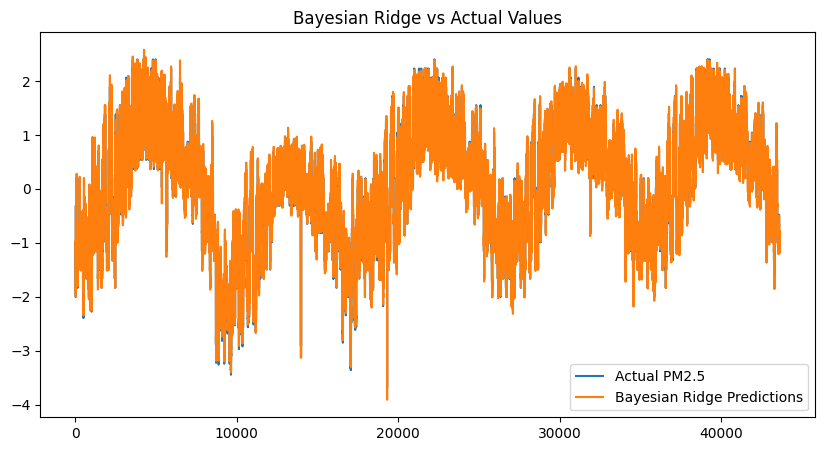

In [13]:
# Plot Bayesian Ridge Results
plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Actual PM2.5")
plt.plot(bayesian_ridge_predictions, label="Bayesian Ridge Predictions")
plt.title('Bayesian Ridge vs Actual Values')
plt.legend()
plt.show()

**Bayesian Network and the relationship between the columns**

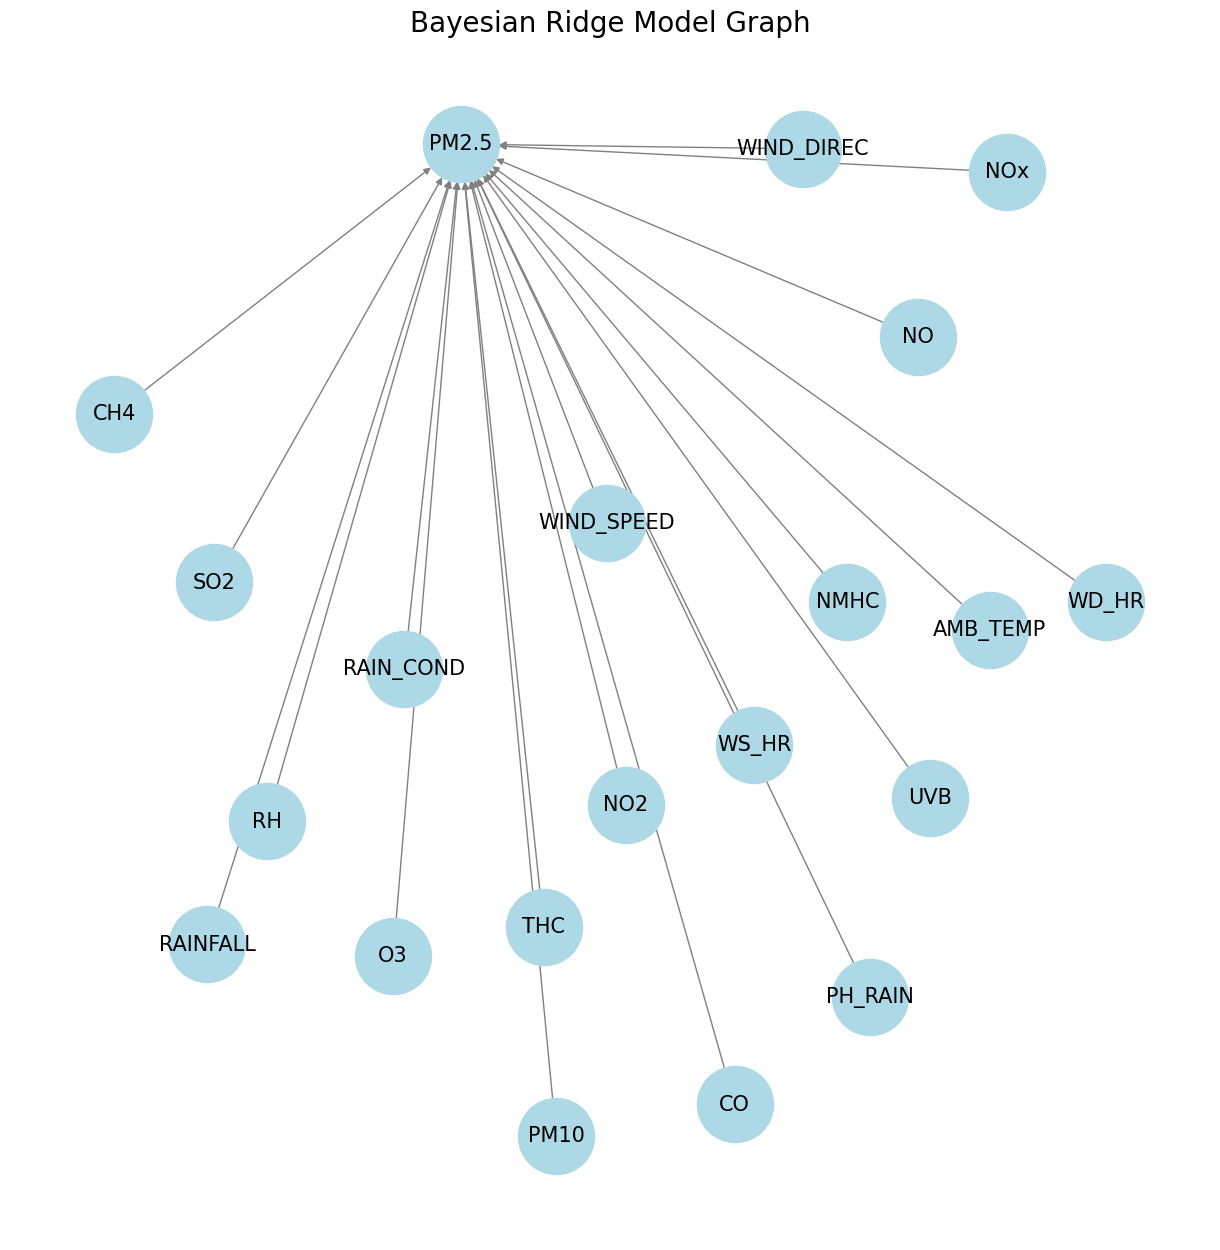

In [14]:
# Define the columns for the Bayesian network
columns = ['AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 
           'PH_RAIN', 'PM10', 'PM2.5', 'RAINFALL', 'RAIN_COND', 
           'RH', 'SO2', 'THC', 'UVB', 'WD_HR', 'WIND_DIREC', 'WIND_SPEED', 'WS_HR']

X = df[columns].drop('PM2.5', axis=1)  
y = df['PM2.5']
bayesian_ridge_model = BayesianRidge()
bayesian_ridge_model.fit(X, y)

# Create a directed graph for the Bayesian network
G = nx.DiGraph()

# Add nodes (features and target)
G.add_nodes_from(X.columns)
G.add_node('PM2.5')

# Add edges based on the Bayesian Ridge model coefficients
for feature, coef in zip(X.columns, bayesian_ridge_model.coef_):
    if coef != 0:  # Only add edges for non-zero coefficients
        G.add_edge(feature, 'PM2.5')

# Plot the Bayesian Ridge Model as a graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # Layout for the graph
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', edge_color='gray', linewidths=1, font_size=15)
plt.title('Bayesian Ridge Model Graph', fontsize=20)
plt.show()


**Other Columns actual value vs Predicted value**


Results for PM2.5:
PM2.5 - MSE: 0.014215401439486658
PM2.5 - MAE: 0.0818384360629203
PM2.5 - RMSE: 0.11922835836950309
PM2.5 - R2: 0.9874495497814612


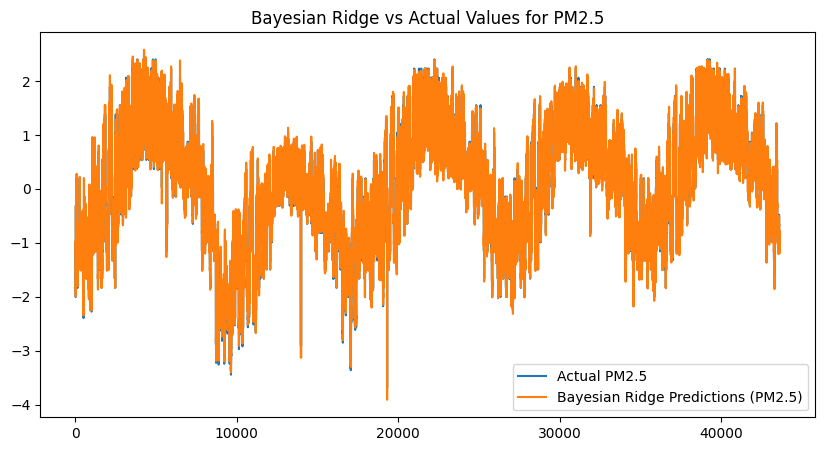


Results for CO:
CO - MSE: 0.014215401439486658
CO - MAE: 0.0818384360629203
CO - RMSE: 0.11922835836950309
CO - R2: 0.9874495497814612


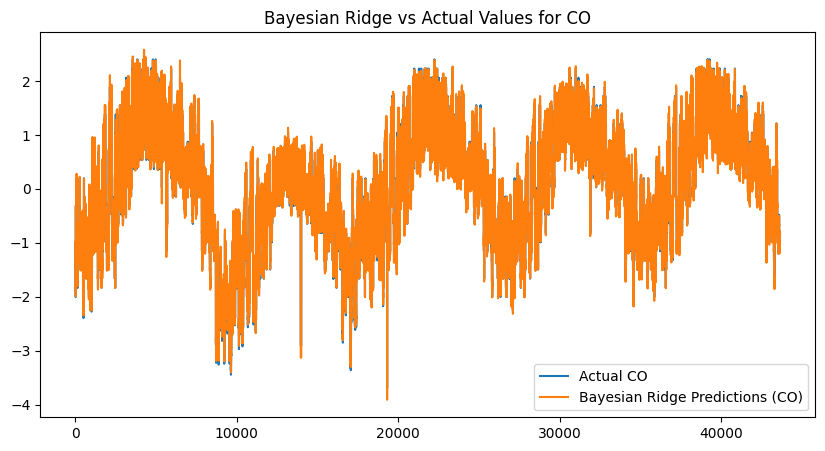


Results for PM10:
PM10 - MSE: 0.014215401439486658
PM10 - MAE: 0.0818384360629203
PM10 - RMSE: 0.11922835836950309
PM10 - R2: 0.9874495497814612


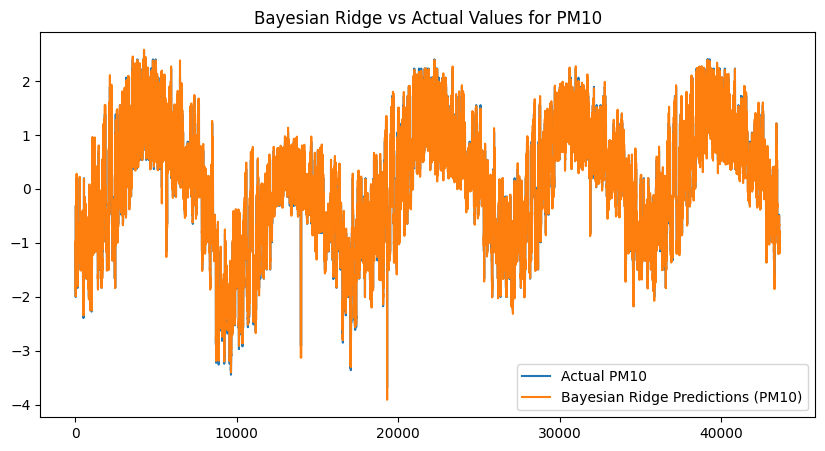


Results for NO2:
NO2 - MSE: 0.014215401439486658
NO2 - MAE: 0.0818384360629203
NO2 - RMSE: 0.11922835836950309
NO2 - R2: 0.9874495497814612


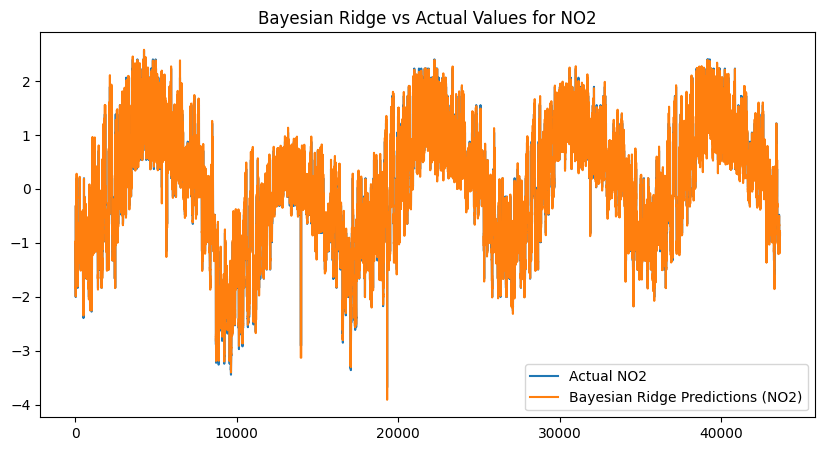

In [15]:
target_columns = ['PM2.5', 'CO', 'PM10', 'NO2']  
for target in target_columns:
    print(f"\nResults for {target}:")
    
    bayesian_ridge = BayesianRidge()
    bayesian_ridge.fit(X_train.reshape(X_train.shape[0], -1), y_train)
    bayesian_ridge_predictions = bayesian_ridge.predict(X_test.reshape(X_test.shape[0], -1))

    # Evaluation metrics
    br_mse = mean_squared_error(y_test, bayesian_ridge_predictions)
    br_mae = mean_absolute_error(y_test, bayesian_ridge_predictions)
    br_r2 = r2_score(y_test, bayesian_ridge_predictions)
    br_rmse = np.sqrt(br_mse) 

    # Print the evaluation results
    print(f"{target} - MSE: {br_mse}")
    print(f"{target} - MAE: {br_mae}")
    print(f"{target} - RMSE: {br_rmse}")
    print(f"{target} - R2: {br_r2}")
    
    # Plot Actual vs Predicted for each target column
    plt.figure(figsize=(10, 5))
    plt.plot(y_test, label=f"Actual {target}")
    plt.plot(bayesian_ridge_predictions, label=f"Bayesian Ridge Predictions ({target})")
    plt.title(f'Bayesian Ridge vs Actual Values for {target}')
    plt.legend()
    plt.show()
